In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


## MAIN DATA

In [3]:
data = pd.read_csv('/kaggle/input/dyslipidemia-tbzmed/output2-dyslipidemia.csv')
data.head()

,sex,tedadaza,age,tahol,tahsilat,shogl,BMIrotbe,kamarzanan,kamarmardan,feshrdarj2,iaesegi,sabegegalb,sabegemagz,sabediabet,sabesaratan,sabegeasm,sabegekabed,sabegekamkhooni,sabegeezterab,sabegeporfeshari,sabegecharbiekhoon,Q1a,Q2a,rosmosbat,rosegradeee,WHS1,GADrotbe,Q1,Q2,FBS,diabetcas,diabeti,Ferritin,anemia,ALT,HB,AST,serumvitD,serumvitDrotb,dyslipd,metabolicsyndrome,saranrognimejamed,faaliat,Physicalactiv,waisttoheightratio,feshartotal,prehyper,hyper1,hyper2,protein,fat,saturfat,polyfat,linoleicfat,epa,sodium,iron,magnesium,zinc,manganese,fluoride,vitaminA,vitaminE,vitaminB1,vitaminB3,folate,pantacid,vitaminc,vitamink,solublefiber,crudefiber,glucose,kilocalories,carbohydrate,cholestrol,monofat,oleicfat,linolenicfat,DHA,potassium,calcium,phosphorus,copper,selenium,chromium,betacarotene,atocopherol,riboB2,pyridoxineB6,cobalaminB12,biotin,vitaminD,dieteryfiber,insolfiber,suger,caffeine,exmilk,exveg,exfruit,exbread,exmeat,exfat,percpro,perccarb,percfat,nansonati,nanrogani,berengsefid,berenjsaboosdar,gooshtkamcharb,gooshtporcharb,morgbapoost,morgbipoost,shirkamcharb,shirporcharb,shircacao,mastkamcharb,mastporcharb,mastkhame,mastchekide,panirmamooli,panirkhamei,panirmahali,rogjamedheiv,rogjamedgiahi,rogjameddonbe,mayecanola,mayesaier,namakioddar,RFAC1_1,RFAC2_1,RFAC3_1
0,2,4,29,2,2,5,0,1,2,5,0,2,2,1,2,2,1,2,1,2,2,0,0,2,0,2,1,0,0,90.0,0,1,83.30,2.0,21.0,13.8,20.0,20.8,2,1,2,34.412025,2,1,0,2,2,1,2,180.215316,226.612379,131.084102,16.766051,13.255908,0.021733,11363.29611,29.479437,557.667146,24.184211,4.621102,43126.45656,2270.293146,3.242412,1.486534,19.009561,567.665898,15.037097,370.730024,319.602403,0.361403,5.948473,13.397034,3648.495206,264.536383,662.256699,117.290915,84.997415,2.156206,0.018558,5507.150046,3810.575218,3325.748058,12.692445,0.211502,1.955476,485.516151,17.794342,3.916119,2.4771,10.278039,57.426357,15.298498,17.67875,2.306655,118.657104,265.950413,1.736165,4.040049,1.977427,8.462864,22.016748,29.537864,19.328571,25.982222,54.334729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,282.121891,308.995025,285.848259
1,2,3,52,2,2,5,4,1,2,1,2,1,2,2,2,2,2,2,2,1,2,0,0,2,0,2,1,0,0,88.0,0,1,41.50,2.0,12.0,14.0,17.0,18.0,3,1,2,41.666667,2,1,2,1,2,2,2,172.600000,219.600000,133.100000,10.380000,7.804000,0.007000,12165.00000,11.240000,360.700000,21.800000,2.906000,23747.00000,2244.000000,2.089000,1.340000,17.810000,494.200000,13.820000,524.800000,317.300000,0.196000,3.436000,8.568000,3261.000000,157.500000,652.600000,62.960000,52.540000,1.896000,0.019000,4105.000000,3727.000000,3057.000000,1.016000,0.199000,0.021000,575.300000,6.406000,3.606000,2.2940,9.278000,38.230000,14.750000,13.02000,1.409000,46.880000,152.500000,0.400000,1.700000,1.200000,6.800000,23.700000,27.800000,21.000000,19.000000,60.000000,2,1,1,2,1,2,2,1,1,1,1,1,1,2,2,1,2,2,2,1,2,2,1,1,249.000000,23.000000,446.000000
2,2,5,42,2,2,5,4,1,1,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,1,1,4,81.0,0,1,34.60,2.0,17.0,14.3,15.0,10.3,3,2,2,34.412025,2,2,2,1,1,2,2,191.100000,244.000000,149.200000,16.110000,13.460000,0.000000,12997.00000,10.050000,397.100000,26.200000,4.416000,46793.00000,2167.000000,1.156000,1.268000,15.550000,564.900000,16.590000,126.700000,403.800000,0.140000,4.744000,5.585000,3478.000000,136.900000,779.900000,64.970000,49.350000,1.854000,0.000000,4423.000000,4654.000000,3664.000000,1.173000,0.220000,0.010000,364.500000,8.340000,4.808000,2.4910,11.900000,38.310000,14.470000,11.07000,0.981000,44.070000,288.900000,1.500000,5.000000,0.200000,4.100000,24.600000,31.600000,22.000000,16.000000,69.000000,2,1,0,0,1,2,2,1,1,2,2,1,2,2,2,1,2,2,2,1,2,2,1,1,11.000000,178.000000,48.000000
3,1,5,15,1,2,3,3,1,2,1,0,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,2,1,4,88.0,0,1,73.70,2.0,104.0,15.2,53.0,33.7,1,1,1,34.412025,2,3,2,1,2,2,2,220.700000,292.900000,182.200000,12.640000,9.363000,0.000000,15203.00000,11.230000,406.000000,27.870000,2.827000,16240.00000,2398.000000,1.969000,1.398000,18.470000,538.000000,19.450000,116.800000,357.500000,0.332000,5.841000,9.398000,4267.000000,197.200000,779.0

### changing columns to prfesional terms

In [4]:
new_columns = [
    "sex", "Number of family members", "age", "Marital Status", "Education Level", "Occupation",
    "BMI (Body Mass Index) Category", "Female Waist Circumference", "Male Waist Circumference",
    "feshrdarj2", "Menopause", "History of Heart Disease", "History of Brain Consumption", 
    "History of Diabetes", "History of Cancer", "History of Asthma", "History of Liver diseases", 
    "History of anemia", "History of Anxiety", "History of High Blood Pressure", "History of hyperlipidemia",
    "Q1a", "Q2a", "ros+", "rosegradeee", "WHS1", "GADrotbe", "Q1", "Q2", "FBS", "diabetcas", "diabeti",
    "Ferritin", "anemia", "ALT", "HB", "AST", "serumvitD", "serumvitDrotb","dyslipd", "metabolicsyndrome", 
    "semi-solid oil per capita", "activity", "Physicalactiv", "waisttoheightratio", "total blood pressure", 
    "prehyper", "hyper1", "hyper2", "protein", "fat", "saturfat", "polyfat", "linoleicfat", "epa", "sodium", 
    "iron", "magnesium", "zinc", "manganese", "fluoride", "vitaminA", "vitaminE", "vitaminB1", "vitaminB3", 
    "folate", "pantacid", "vitaminc", "vitamink", "solublefiber", "crudefiber", "glucose", "kilocalories", 
    "carbohydrate", "cholestrol", "monofat", "oleicfat", "linolenicfat", "DHA", "potassium", "calcium", 
    "phosphorus", "copper", "selenium", "chromium", "betacarotene", "atocopherol", "riboB2", "pyridoxineB6", 
    "cobalaminB12", "biotin", "vitaminD", "dieteryfiber", "insolfiber", "suger", "caffeine", "exmilk", 
    "exveg", "exfruit", "exbread", "exmeat", "exfat", "percpro", "perccarb", "percfat", "cottage bread", 
    "oliy bread", "white rice", "whole grain rice", "low fat meat", "high fat meat", "skinned chicken", 
    "skinless chicken", "low fat milk", "high fat milk", "chocolate milk", "low fat yogurt", "high fat yogurt", 
    "creamy youghurt", "greek yogurt", "normal white cheese", "creamy cheese", "cottage cheese", 
    "solid animal oil", "solid vegetable oil", "fat tail oil", "liquid canola oil", "mayesaier", 
    "Iodized salt", "RFAC1_1", "RFAC2_1", "RFAC3_1"
]

data.columns=new_columns

## Data Information

In [5]:
data_info = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.notnull().sum(),
    'Null Count': data.isnull().sum(),
    'Dtype': data.dtypes
})
data_info.reset_index(drop=True, inplace=True)

In [6]:
data_info.head()

,Column,Non-Null Count,Null Count,Dtype
0,sex,547,0,int64
1,Number of family members,547,0,object
2,age,547,0,int64
3,Marital Status,547,0,int64
4,Education Level,547,0,int64


#### Columns with NULL data

In [7]:
data_info[data_info['Null Count'] != 0]

,Column,Non-Null Count,Null Count,Dtype


#### Different datatypes of data

In [8]:
data_info['Dtype'].unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

##### Columns with "OBJECT" Datatype

In [9]:
data_info[data_info['Dtype'] == 'O']

,Column,Non-Null Count,Null Count,Dtype
1,Number of family members,547,0,object
5,Occupation,547,0,object
11,History of Heart Disease,547,0,object
12,History of Brain Consumption,547,0,object
13,History of Diabetes,547,0,object
14,History of Cancer,547,0,object
15,History of Asthma,547,0,object
16,History of Liver diseases,547,0,object
17,History of anemia,547,0,object
18,History of Anxiety,547,0,object


#### Unique values of columns with 'OBJECT' datatype

In [10]:
object_columns = data.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("-" * 50)

Column: Number of family members
Unique values: ['4' '3' '5' '1' '2' '6' ' ' '7' '8' '10']
--------------------------------------------------
Column: Occupation
Unique values: ['5' '3' '4' '2' '6' '1' ' ']
--------------------------------------------------
Column: History of Heart Disease
Unique values: ['2' '1' ' ']
--------------------------------------------------
Column: History of Brain Consumption
Unique values: ['2' '1' '22' ' ' '12']
--------------------------------------------------
Column: History of Diabetes
Unique values: ['1' '2' ' ' '3']
--------------------------------------------------
Column: History of Cancer
Unique values: ['2' '1' ' ']
--------------------------------------------------
Column: History of Asthma
Unique values: ['2' '1' ' ']
--------------------------------------------------
Column: History of Liver diseases
Unique values: ['1' '2' ' ']
--------------------------------------------------
Column: History of anemia
Unique values: ['2' '1' ' ']
----------

#### Unique values of columns with 'INT' datatype

In [11]:
object_columns = data.select_dtypes(include='int64').columns

for column in object_columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("-" * 50)

Column: sex
Unique values: [2 1 3]
--------------------------------------------------
Column: age
Unique values: [29 52 42 15 21 41 18 35 44 62 50 34 54 60 46 28 51 49 63 45 57 58 71 32
 22 43 40 72 39 31 26 36 56 24 53 55 27 47 59 38 37 25 33 48 30 17 61 16
 23 20 66 65 64 19 74 14]
--------------------------------------------------
Column: Marital Status
Unique values: [2 1]
--------------------------------------------------
Column: Education Level
Unique values: [2 3 1]
--------------------------------------------------
Column: BMI (Body Mass Index) Category
Unique values: [0 4 3 2 5 6 1]
--------------------------------------------------
Column: Female Waist Circumference
Unique values: [1 2]
--------------------------------------------------
Column: Male Waist Circumference
Unique values: [2 1]
--------------------------------------------------
Column: feshrdarj2
Unique values: [5 1 2 0 6 4 3]
--------------------------------------------------
Column: Menopause
Unique values: [ 0 

In [12]:
df= data.copy()

##### Convert Columns with 'OBJECT' dtype to 'INT' dtype in new data frame

In [13]:
def convert_to_float(data):
    for col in data.columns:
        if data[col].dtype == 'object':

            data[col] = data[col].replace(' ', -1)

            data[col] = pd.to_numeric(data[col], errors='coerce').fillna(-1).astype(int)
    return df

df = convert_to_float(df)

In [14]:
df_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Dtype': df.dtypes
})
df_info.reset_index(drop=True, inplace=True)

#### Different datatypes of new dataframe

In [15]:
df_info['Dtype'].unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [16]:
df_info.head()

,Column,Non-Null Count,Null Count,Dtype
0,sex,547,0,int64
1,Number of family members,547,0,int64
2,age,547,0,int64
3,Marital Status,547,0,int64
4,Education Level,547,0,int64


#### Columns with 'OBJECT' dtype in -DATA- but 'INT' dtype in -df-

In [17]:
columns_with_minus1 = [col for col in df.columns if (df[col] == -1).any()]
print(columns_with_minus1)

['Number of family members', 'Occupation', 'History of Heart Disease', 'History of Brain Consumption', 'History of Diabetes', 'History of Cancer', 'History of Asthma', 'History of Liver diseases', 'History of anemia', 'History of Anxiety', 'History of High Blood Pressure', 'History of hyperlipidemia', 'WHS1', 'diabeti', 'metabolicsyndrome', 'activity', 'Physicalactiv', 'total blood pressure']


In [18]:
float_columns = df.select_dtypes(include='float64')

float_columns_describe = float_columns.describe().round(2)

float_columns_describe = float_columns_describe.transpose()
pd.set_option('display.expand_frame_repr', False)
print(float_columns_describe)


                           count      mean        std     min       25%       50%       75%         max
FBS                        547.0     89.47      30.27    0.00     77.00     86.00     94.00      355.00
Ferritin                   547.0     89.98     159.54    1.24     31.45     67.10    114.25     3337.30
anemia                     547.0      1.90       0.29    1.00      2.00      2.00      2.00        2.00
ALT                        547.0     19.53      16.33    5.00     12.00     16.00     23.00      307.00
HB                         547.0     14.06       1.81    5.58     13.00     14.06     15.00       29.00
AST                        547.0     21.30       6.89    6.00     17.00     20.00     24.00       76.00
serumvitD                  547.0     24.35      21.48    5.00     13.35     19.60     27.35      222.00
semi-solid oil per capita  547.0     34.41      16.46    2.78     33.33     34.41     34.41      166.67
protein                    547.0    180.22     104.03   18.68   

In [19]:
float_columns = df.select_dtypes(include=['float64']).columns

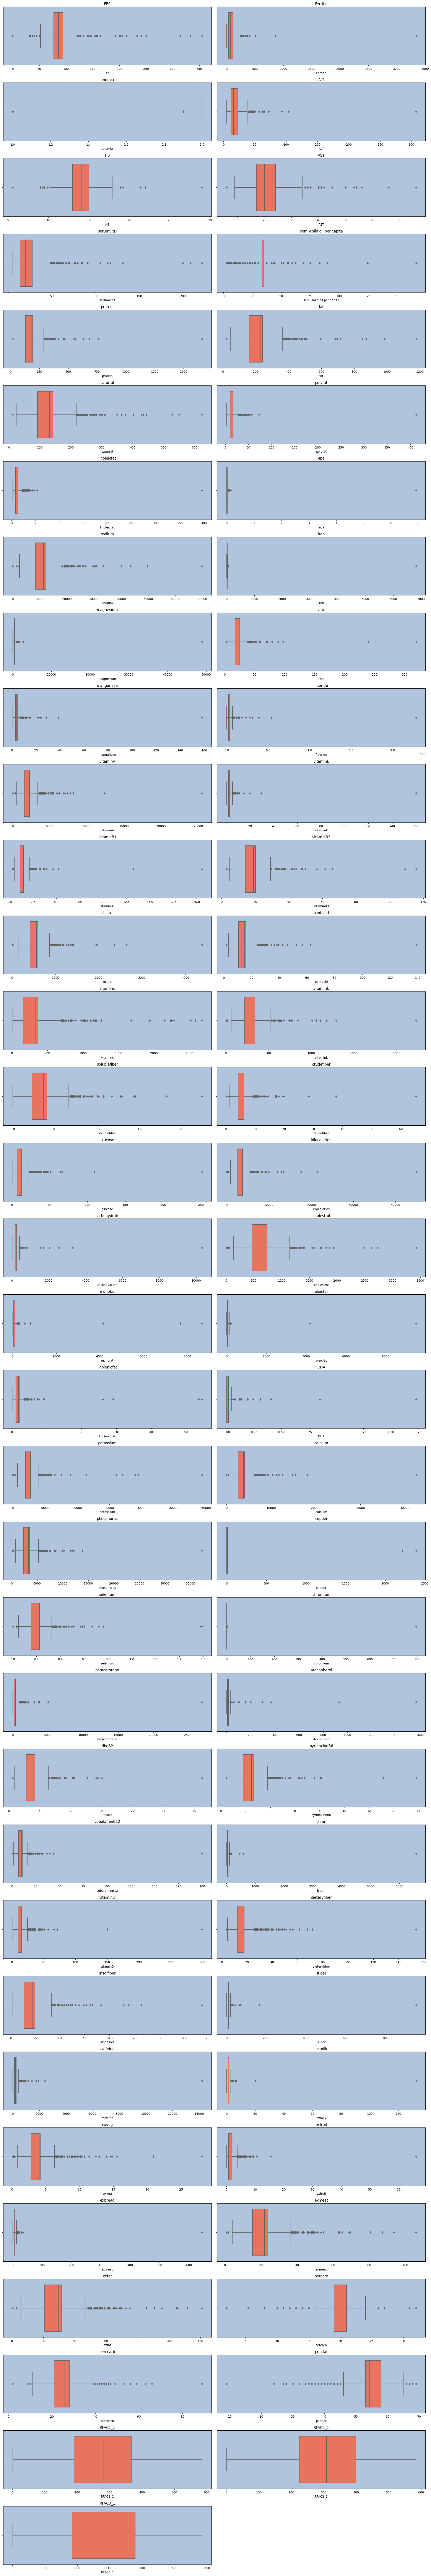

In [26]:
num_plots = len(float_columns)
num_rows = (num_plots + 1) // 2

fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 3.5))

for i, column in enumerate(float_columns):
    sns.boxplot(x=df[column], orient='h', color='tomato', ax=ax.flatten()[i])
    ax.flatten()[i].set_title(column, loc='center')
    ax.flatten()[i].set_facecolor('lightsteelblue')

if num_plots % 2 != 0:
    ax.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()

## TARGET COLUMN

In [22]:
df['dyslipd'].unique()

array([1, 2, 0])

In [86]:
df['dyslipd'].value_counts()

dyslipd
1    443
2     88
0     16
Name: count, dtype: int64

Text(0.5, 0, 'Values')

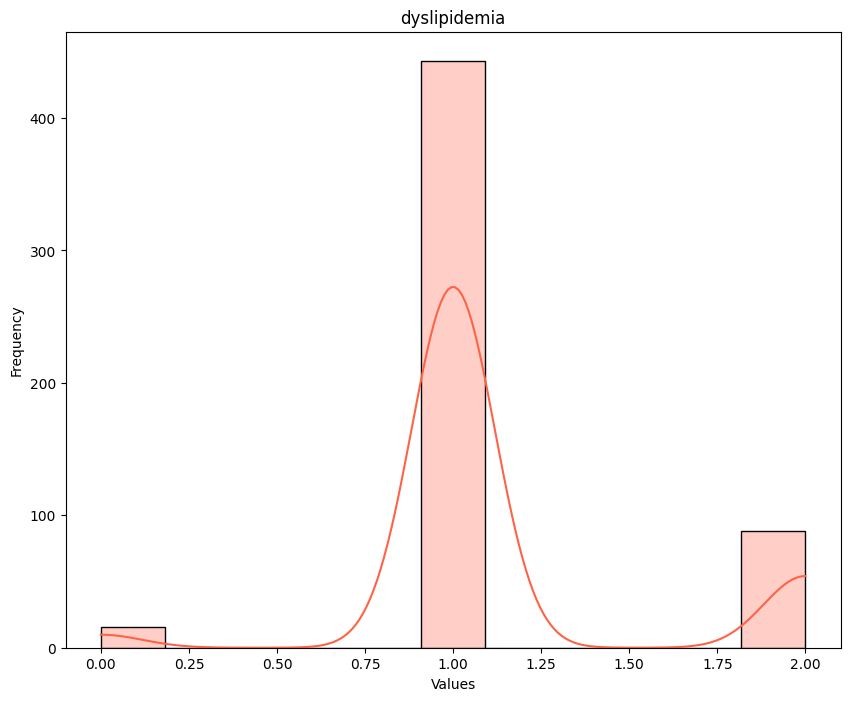

In [25]:
fig1 , ax1 = plt.subplots(figsize=(10,8))
sns.histplot(df['dyslipd'] , kde=True , color='tomato' ,alpha=0.3)
ax1.set_title('dyslipidemia')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Values')

In [37]:
Int_columns = df.select_dtypes(include=['int64']).columns
Int_columns

Index(['sex', 'Number of family members', 'age', 'Marital Status',
       'Education Level', 'Occupation', 'BMI (Body Mass Index) Category',
       'Female Waist Circumference', 'Male Waist Circumference', 'feshrdarj2',
       'Menopause', 'History of Heart Disease', 'History of Brain Consumption',
       'History of Diabetes', 'History of Cancer', 'History of Asthma',
       'History of Liver diseases', 'History of anemia', 'History of Anxiety',
       'History of High Blood Pressure', 'History of hyperlipidemia', 'Q1a',
       'Q2a', 'ros+', 'rosegradeee', 'WHS1', 'GADrotbe', 'Q1', 'Q2',
       'diabetcas', 'diabeti', 'serumvitDrotb', 'dyslipd', 'metabolicsyndrome',
       'activity', 'Physicalactiv', 'waisttoheightratio',
       'total blood pressure', 'prehyper', 'hyper1', 'hyper2', 'cottage bread',
       'oliy bread', 'white rice', 'whole grain rice', 'low fat meat',
       'high fat meat', 'skinned chicken', 'skinless chicken', 'low fat milk',
       'high fat milk', 'chocolate 

In [187]:
palette_mako = sns.color_palette("mako", 3)
palette_rocket = sns.color_palette("rocket", 5)
palette_viridis = sns.color_palette("viridis", 3)
palette_flare = sns.color_palette("flare", 5)

def calculate_and_plot_ratio(data, group_columns, value_column, ax, palette):
    # Calculate the total count
    total_counts = data.groupby(group_columns[0])[value_column].transform('count')
    
    # Calculate the ratio
    data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
    
    # Plotting
    sns.barplot(data=data, x=value_column, y='Ratio', hue=group_columns[0], palette=palette, ax=ax)
    ax.set_title(f'Ratio of {value_column} by {group_columns[0]}')
    ax.set_xlabel(value_column)
    ax.set_ylabel('Ratio')
    ax.legend(title=group_columns[0])

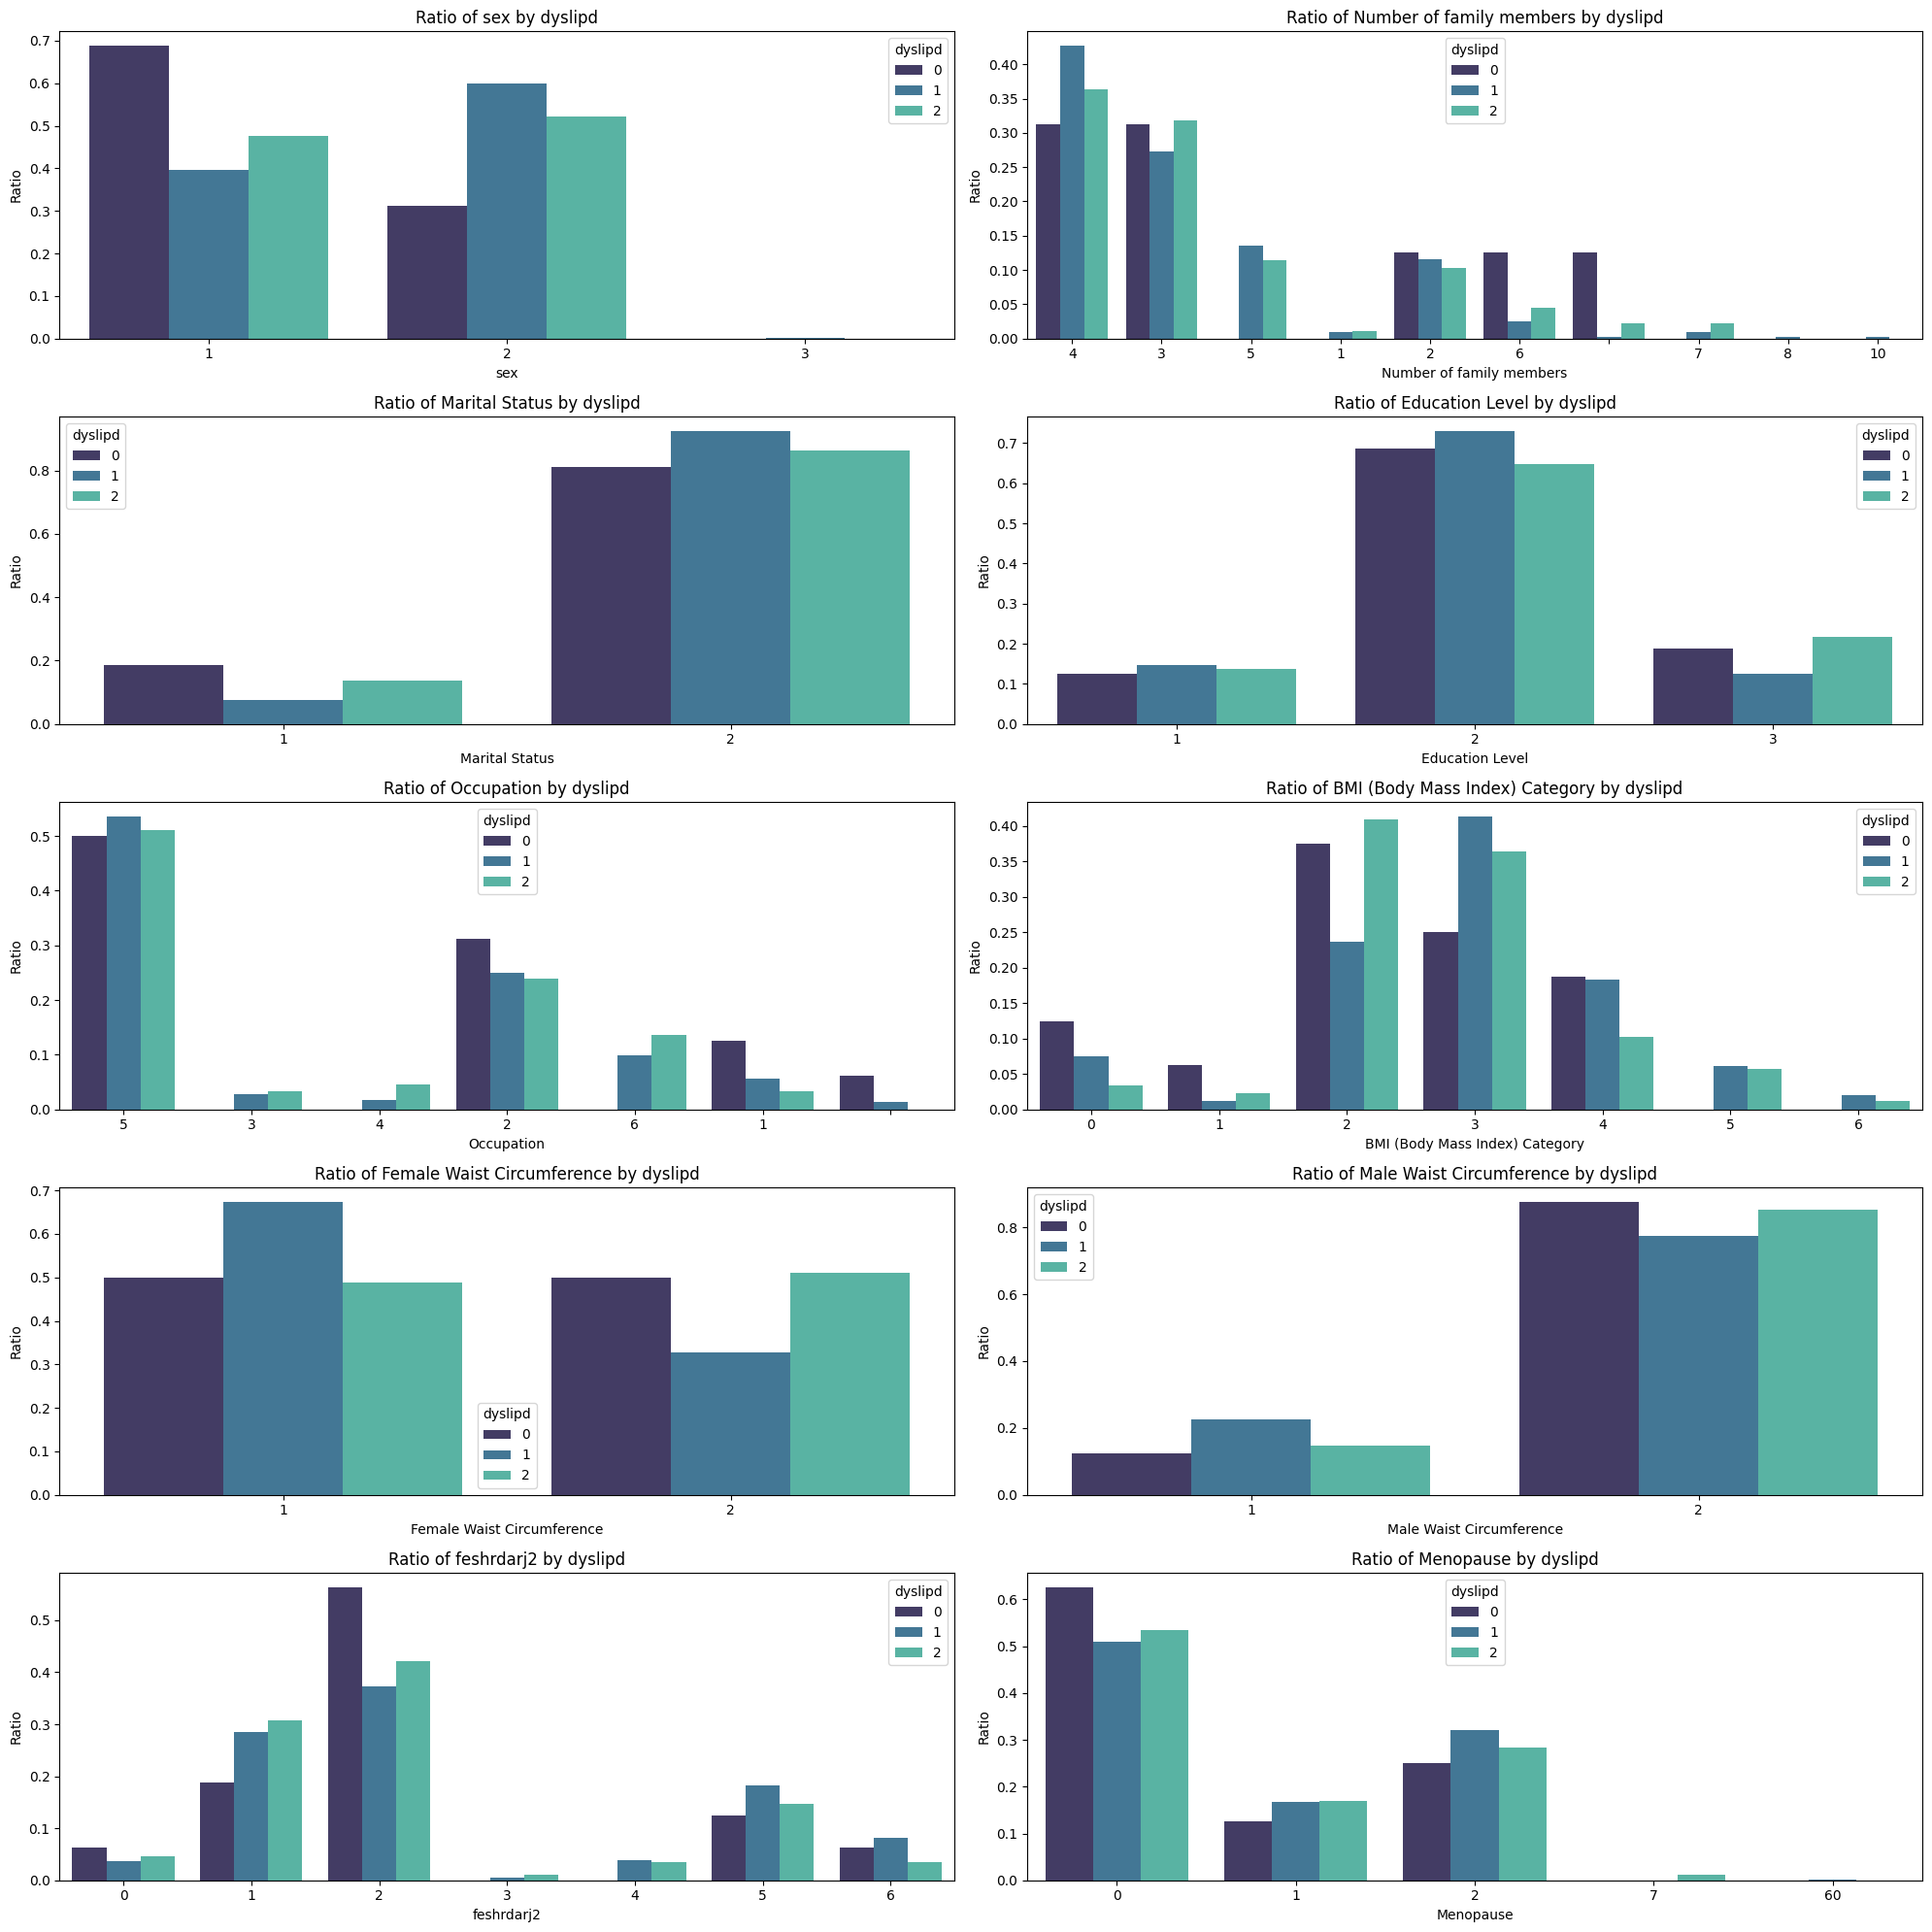

In [149]:
value_columns_mako = [
    ('sex', 'sex'), 
    ('Number of family members', 'Number of family members'), 
    ('Marital Status', 'Marital Status'),
    ('Education Level', 'Education Level'), 
    ('Occupation', 'Occupation'), 
    ('BMI (Body Mass Index) Category', 'BMI (Body Mass Index) Category'),
    ('Female Waist Circumference', 'Female Waist Circumference'), 
    ('Male Waist Circumference', 'Male Waist Circumference'), 
    ('feshrdarj2', 'feshrdarj2'),
    ('Menopause', 'Menopause')
]


fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_mako):
    calculate_and_plot_ratio(data, ['dyslipd', group_col], value_col, ax, palette=palette_mako)

plt.tight_layout()
plt.show()

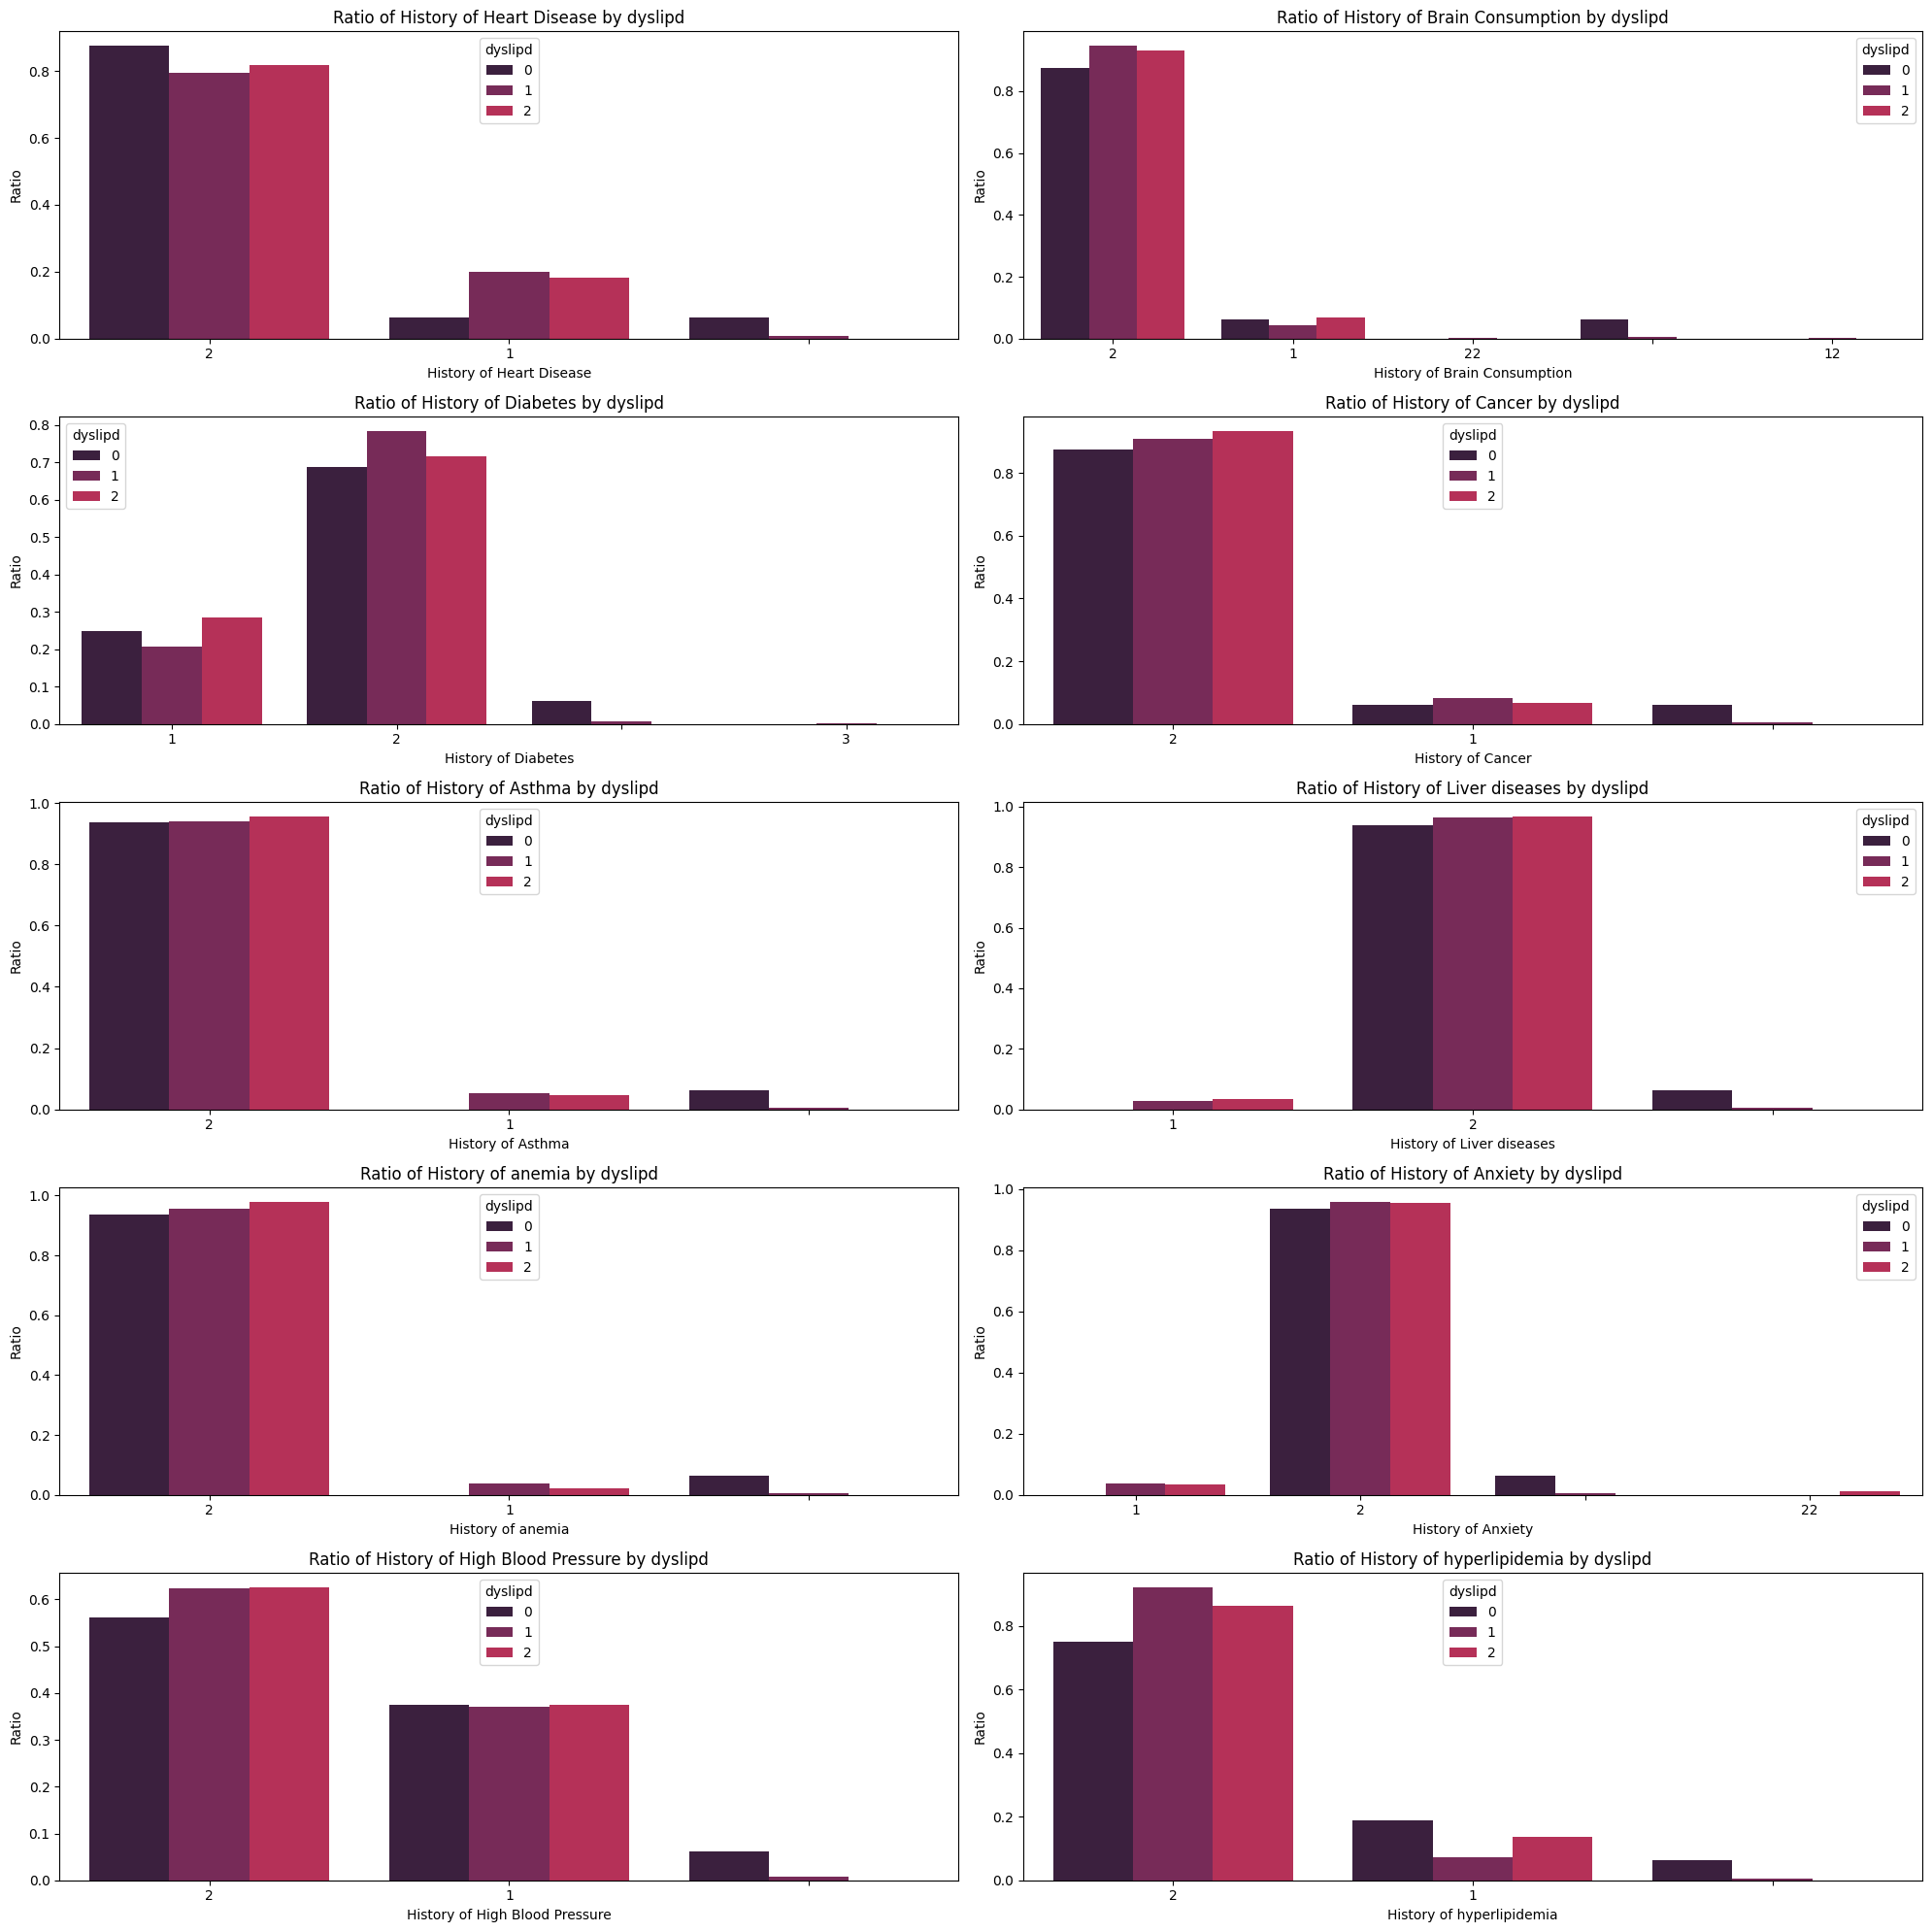

In [151]:
value_columns_rocket  = [
    ('History of Heart Disease', 'History of Heart Disease'), 
    ('History of Brain Consumption', 'History of Brain Consumption'),
    ('History of Diabetes', 'History of Diabetes'),
    ('History of Cancer', 'History of Cancer'), 
    ('History of Asthma', 'History of Asthma'), 
    ('History of Liver diseases', 'History of Liver diseases'),
    ('History of anemia', 'History of anemia'), 
    ('History of Anxiety', 'History of Anxiety'), 
    ('History of High Blood Pressure', 'History of High Blood Pressure'),
    ('History of hyperlipidemia', 'History of hyperlipidemia')
]


fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_rocket):
    calculate_and_plot_ratio(data, ['dyslipd', group_col], value_col, ax, palette=palette_rocket)

plt.tight_layout()
plt.show()

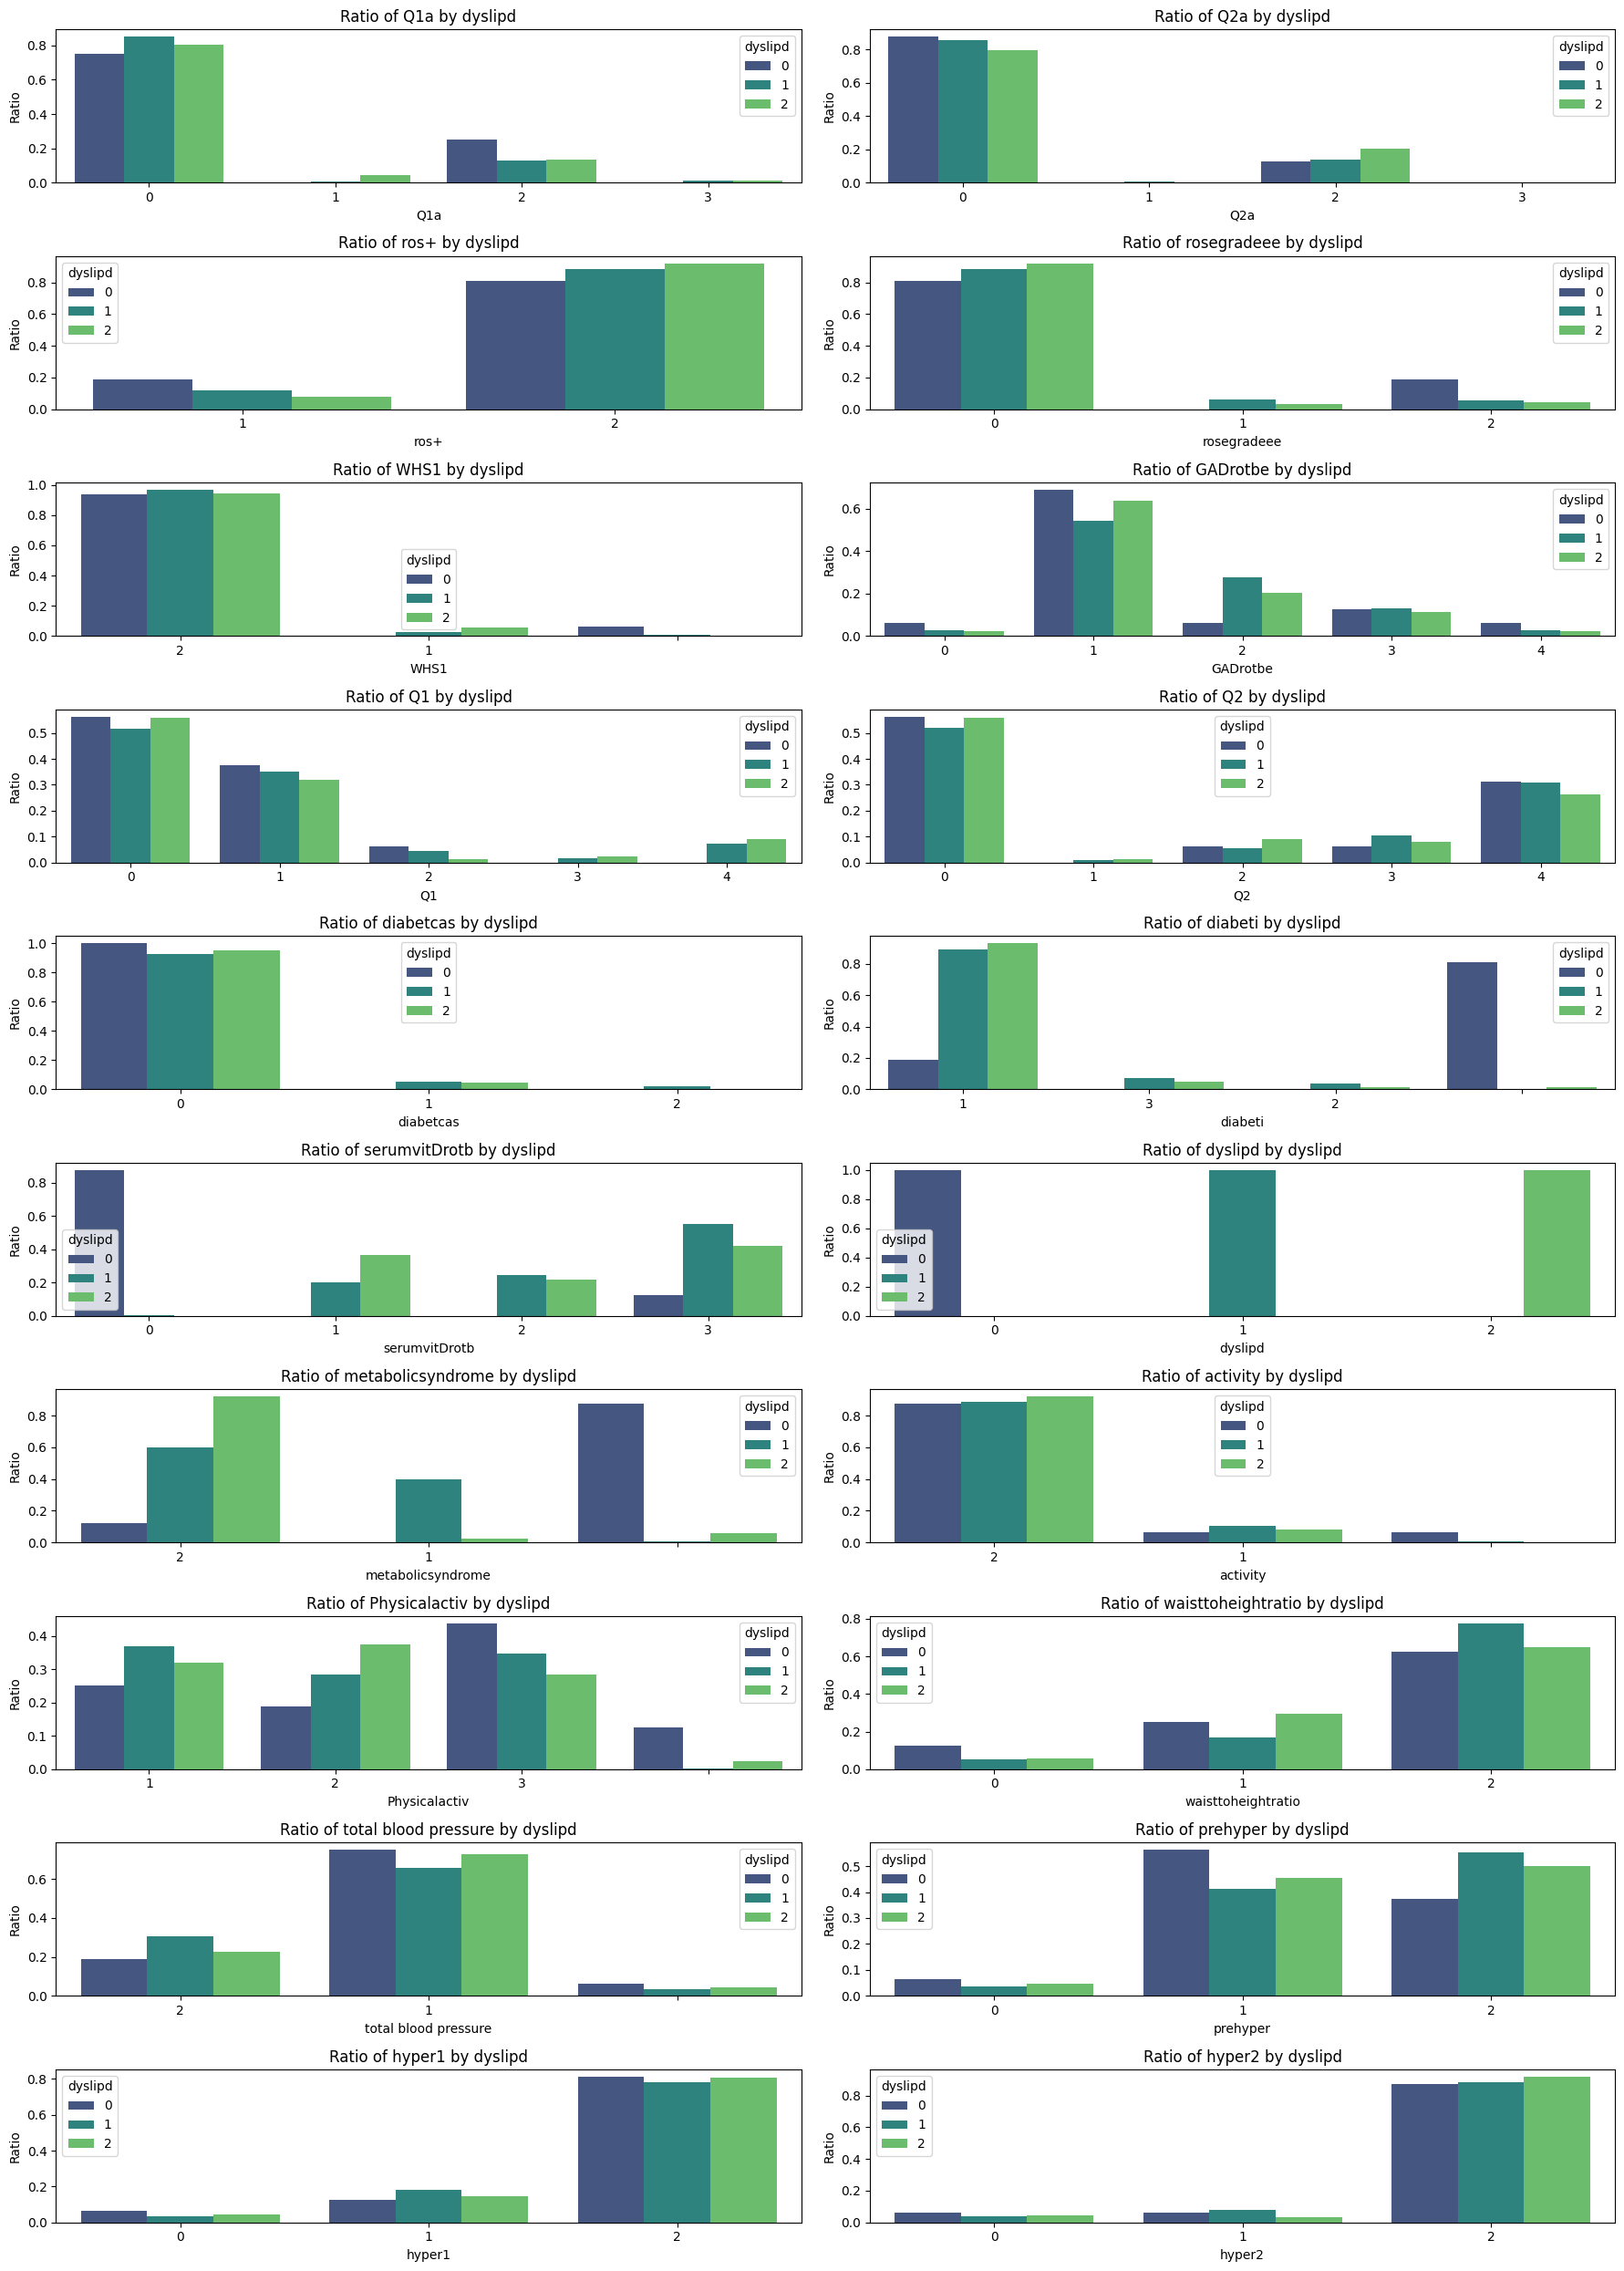

In [177]:
value_columns_cviridis = [
    ('Q1a', 'Q1a'), 
    ('Q2a', 'Q2a'), 
    ('ros+', 'ros+'),
    ('rosegradeee', 'rosegradeee'), 
    ('WHS1', 'WHS1'), 
    ('GADrotbe', 'GADrotbe'),
    ('Q1', 'Q1'), 
    ('Q2', 'Q2'), 
    ('diabetcas', 'diabetcas'),
    ('diabeti', 'diabeti'), 
    ('serumvitDrotb', 'serumvitDrotb'), 
    ('dyslipd', 'dyslipd'), 
    ('metabolicsyndrome', 'metabolicsyndrome'), 
    ('activity', 'activity'), 
    ('Physicalactiv', 'Physicalactiv'), 
    ('waisttoheightratio', 'waisttoheightratio'), 
    ('total blood pressure', 'total blood pressure'), 
    ('prehyper', 'prehyper'), 
    ('hyper1', 'hyper1'), 
    ('hyper2', 'hyper2')
]

fig, axes = plt.subplots(10, 2, figsize=(18, 25))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_cviridis):
    calculate_and_plot_ratio(data, ['dyslipd', group_col], value_col, ax, palette=palette_viridis)

plt.tight_layout()
plt.show()

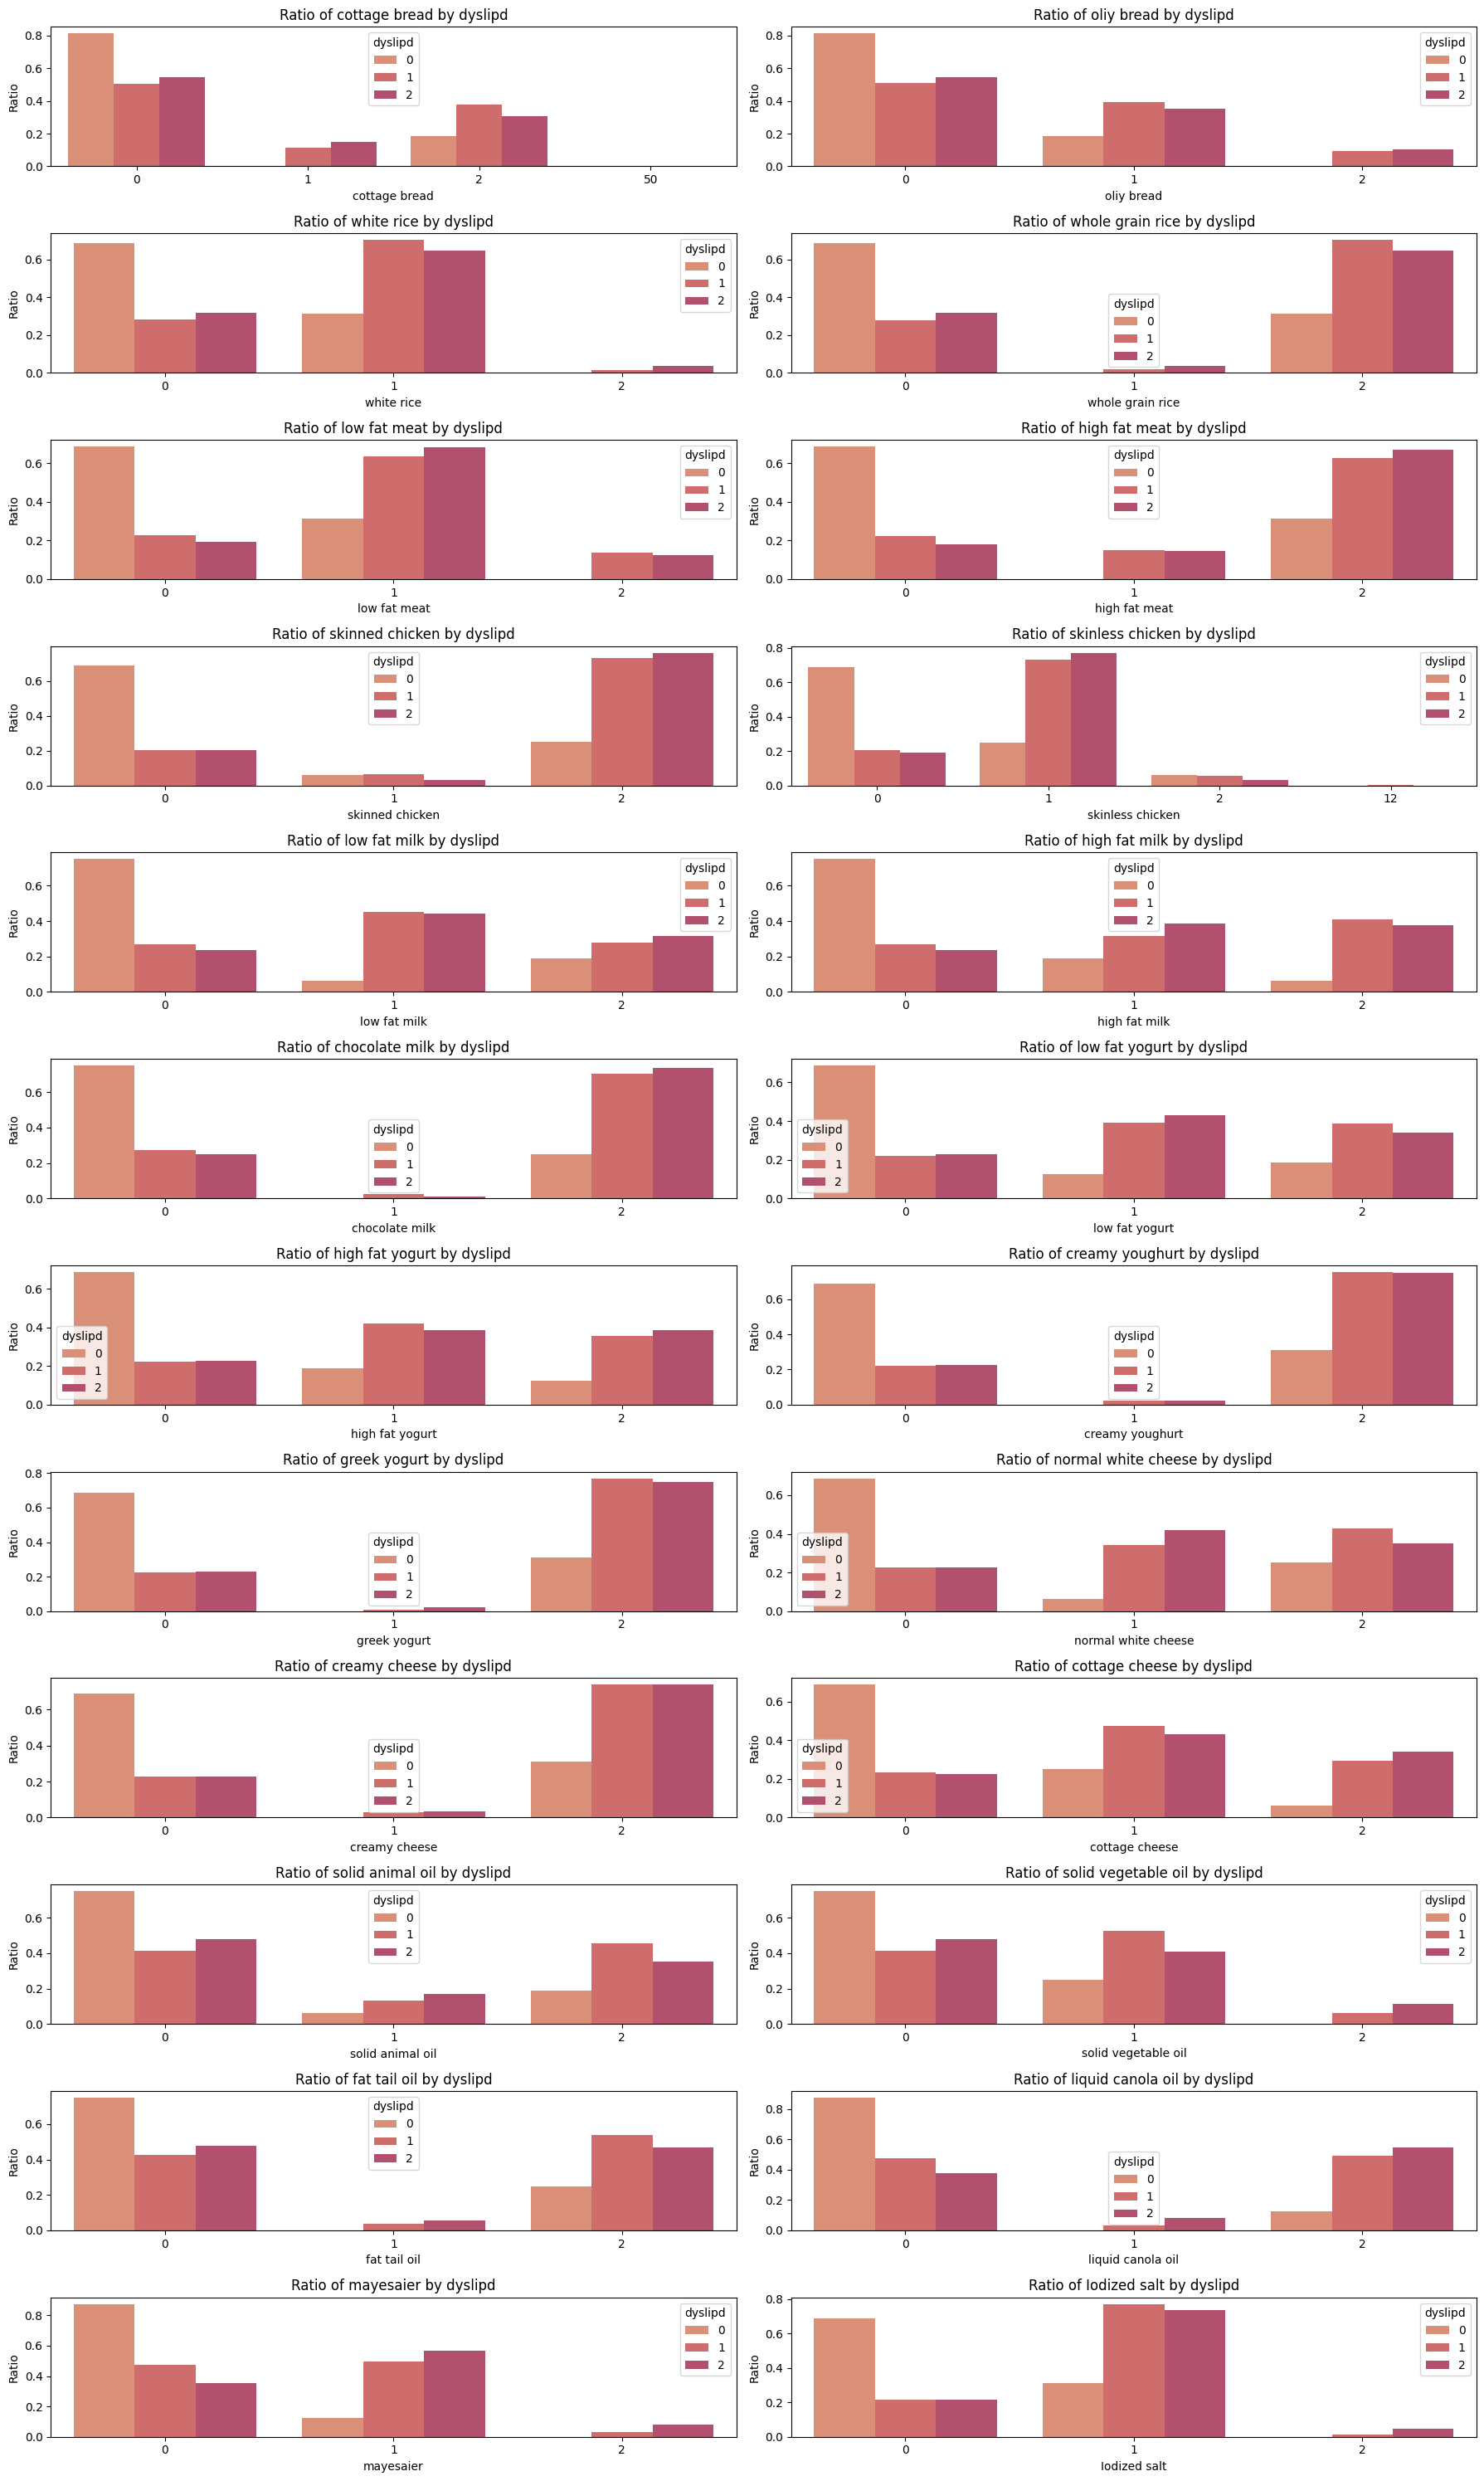

In [188]:
value_columns_flare = [
    ('cottage bread', 'cottage bread'),
    ('oliy bread', 'oliy bread'),
    ('white rice', 'white rice'),
    ('whole grain rice', 'whole grain rice'),
    ('low fat meat', 'low fat meat'),
    ('high fat meat', 'high fat meat'),
    ('skinned chicken', 'skinned chicken'),
    ('skinless chicken', 'skinless chicken'),
    ('low fat milk', 'low fat milk'),
    ('high fat milk', 'high fat milk'),
    ('chocolate milk', 'chocolate milk'),
    ('low fat yogurt', 'low fat yogurt'),
    ('high fat yogurt', 'high fat yogurt'),
    ('creamy youghurt', 'creamy youghurt'),
    ('greek yogurt', 'greek yogurt'),
    ('normal white cheese', 'normal white cheese'),
    ('creamy cheese', 'creamy cheese'),
    ('cottage cheese', 'cottage cheese'),
    ('solid animal oil', 'solid animal oil'),
    ('solid vegetable oil', 'solid vegetable oil'),
    ('fat tail oil', 'fat tail oil'),
    ('liquid canola oil', 'liquid canola oil'),
    ('mayesaier', 'mayesaier'),
    ('Iodized salt', 'Iodized salt')
]


fig, axes = plt.subplots(12, 2, figsize=(18, 30))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_flare):
    calculate_and_plot_ratio(data, ['dyslipd', group_col], value_col, ax, palette=palette_flare)

plt.tight_layout()
plt.show()